In [108]:
from pandas import DataFrame,read_csv,read_excel,merge,melt,pivot_table
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb
import sys
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score,silhouette_samples
from factor_analyzer.factor_analyzer import calculate_kmo

import matplotlib.cm as cm
from sklearn.metrics import homogeneity_score, completeness_score 
from sklearn.metrics import v_measure_score, adjusted_rand_score
from scipy.spatial import ConvexHull

In [3]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (8, 5)
plt.rcParams["axes.unicode_minus"] = False

In [63]:
origin=read_excel('행정동병합최종.xlsx')
origin.head(2)

,시도명,시군구코드,시군구명,행정동코드,행정동코드_수정,읍면동명,생성일자,말소일자,지하철역_수,의료기관_수,...,보육시설수,세대당공원면적minmax,수변점수,행정동별버스정류장수,행정동별유통업체수,공공자전거대여소수,여가생활지수minmax,사회적약자_지원_인프라_밀집도minmax,접근성지수minmax,그린지수minmax
0,서울특별시,11110,종로구,1111051500,11110515,청운효자동,20081101,0,0,11,...,4,0.352898,0,32,0,3,0.038298,0.120179,0.035322,0.187151
1,서울특별시,11110,종로구,1111053000,11110530,사직동,19880423,0,2,75,...,0,0.063554,0,27,0,12,0.093504,0.033721,0.131414,0.033704


In [64]:
origin1=origin.filter(['읍면동명','그린지수minmax','여가생활지수minmax','사회적약자_지원_인프라_밀집도minmax','접근성지수minmax'])
origin1.head(2)

,읍면동명,그린지수minmax,여가생활지수minmax,사회적약자_지원_인프라_밀집도minmax,접근성지수minmax
0,청운효자동,0.187151,0.038298,0.120179,0.035322
1,사직동,0.033704,0.093504,0.033721,0.131414


## `k-means 시각화`

### 그린지수와 여가생활지수

In [65]:
origin2=origin1.copy()
X = origin2.iloc[:,[1,2]].values #x값으로 공원면적,여가생활지수 지정
X[:5] #5개까지만 보이게

array([[0.1871514 , 0.03829759],
       [0.03370444, 0.09350384],
       [0.5303279 , 0.0771323 ],
       [0.5303279 , 0.02457249],
       [0.53095996, 0.00764895]])

In [66]:
n = 6
kmeans = KMeans(n_clusters=n,n_init=10,max_iter=100)
clusters = kmeans.fit_predict(X)

In [67]:
centroids = kmeans.cluster_centers_
centroids

array([[0.52787431, 0.15043406],
       [0.01647838, 0.06586268],
       [0.26327214, 0.03552411],
       [0.53428146, 0.03497766],
       [0.08616458, 0.59052199],
       [0.87176207, 0.02097843]])

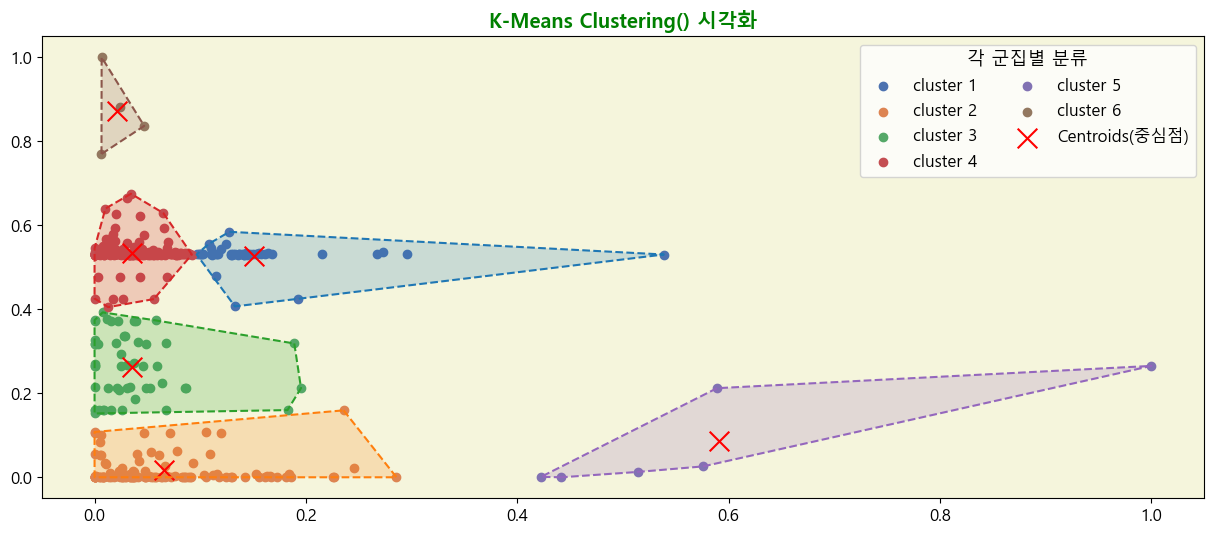

In [69]:
modern_palette = sb.color_palette("deep", n_colors=n)
plt.figure(figsize=(15, 6))
plt.title('K-Means Clustering() 시각화', color='green',fontweight='bold')
# plt.xlabel('그린지수minmax', color='green',fontweight='bold')
# plt.ylabel('여가생활지수minmax', color='green',fontweight='bold')
plt.gca().set_facecolor("Beige")
tmp_x = X
for i in range(n):
    points = tmp_x[clusters == i]
    plt.scatter(points[:, 1], points[:, 0], label=f'cluster {i+1}',color=modern_palette[i])

    hull = ConvexHull(points)
    vert = np.append(hull.vertices, hull.vertices[0])  # close the polygon by appending the first point at the end
    plt.plot(points[vert, 1], points[vert, 0], '--', )
    plt.fill(points[vert, 1], points[vert, 0], alpha=0.2)

plt.scatter(centroids[:, 1], centroids[:, 0], s=200, c='red', label='Centroids(중심점)', marker='x')

plt.legend(title="각 군집별 분류",title_fontsize=13,ncol=2,loc='upper right')
plt.show()
plt.close()

### 그린지수와 사회적약자 지수

In [75]:
origin4=origin2.copy()
Y = origin4.iloc[:,[1,3]].values #x값으로 그린지수,사회적약자지수 지정
Y[:5]

array([[0.1871514 , 0.12017876],
       [0.03370444, 0.03372072],
       [0.5303279 , 0.07869154],
       [0.5303279 , 0.10408629],
       [0.53095996, 0.48987935]])

In [76]:
n=6
kmeans1 = KMeans(n_clusters=n,n_init=10,max_iter=100).fit(Y) #군집 6개로 나누겠다
clusters1 = kmeans1.fit_predict(Y)

In [77]:
centroids1 = kmeans1.cluster_centers_
centroids1

array([[0.02508982, 0.32991605],
       [0.53453027, 0.04710284],
       [0.01421188, 0.04001805],
       [0.61355698, 0.35040455],
       [0.25590438, 0.03305781],
       [0.49526918, 0.72374817]])

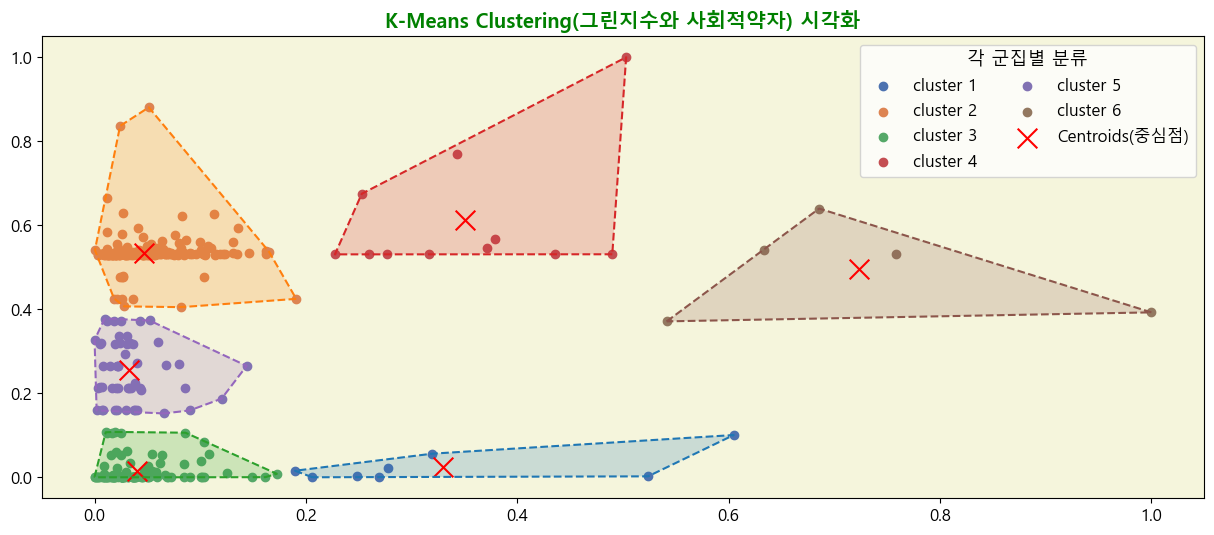

In [92]:
modern_palette = sb.color_palette("deep", n_colors=n)
plt.figure(figsize=(15, 6))
plt.title('K-Means Clustering(그린지수와 사회적약자) 시각화', color='green',fontweight='bold')
# plt.xlabel('사회적약자_지원_인프라_밀집도minmax', color='green',fontweight='bold')
# plt.ylabel('그린지수minmax', color='green',fontweight='bold')
plt.gca().set_facecolor("Beige")
tmp_x = Y
for i in range(n):
    points = tmp_x[clusters1 == i] #클러스터 변수
    plt.scatter(points[:, 1], points[:, 0], label=f'cluster {i+1}',color=modern_palette[i])

    hull = ConvexHull(points)
    vert = np.append(hull.vertices, hull.vertices[0])  # close the polygon by appending the first point at the end
    plt.plot(points[vert, 1], points[vert, 0], '--', )
    plt.fill(points[vert, 1], points[vert, 0], alpha=0.2)

plt.scatter(centroids1[:, 1], centroids1[:, 0], s=200, c='red', label='Centroids(중심점)', marker='x') #센트로이드 변수

plt.legend(title="각 군집별 분류",title_fontsize=13,ncol=2,loc='upper right')
plt.show()
plt.close()

### 그린지수와 접근성지수

In [87]:
origin5=origin2.copy()
Z = origin5.iloc[:,[1,4]].values #x값으로 그린지수,접근성지수 지정
Z[:5]

array([[0.1871514 , 0.03532155],
       [0.03370444, 0.13141365],
       [0.5303279 , 0.04061359],
       [0.5303279 , 0.04338528],
       [0.53095996, 0.01899458]])

In [88]:
n=6
kmeans2 = KMeans(n_clusters=n,n_init=10,max_iter=100).fit(Z) #군집 6개로 나누겠다
clusters2 = kmeans2.fit_predict(Z)

In [89]:
centroids2 = kmeans2.cluster_centers_
centroids2

array([[0.26024682, 0.13567935],
       [0.52141308, 0.22955357],
       [0.02699365, 0.2444868 ],
       [0.54394492, 0.08465092],
       [0.0404122 , 0.78016439],
       [0.01515213, 0.10733185]])

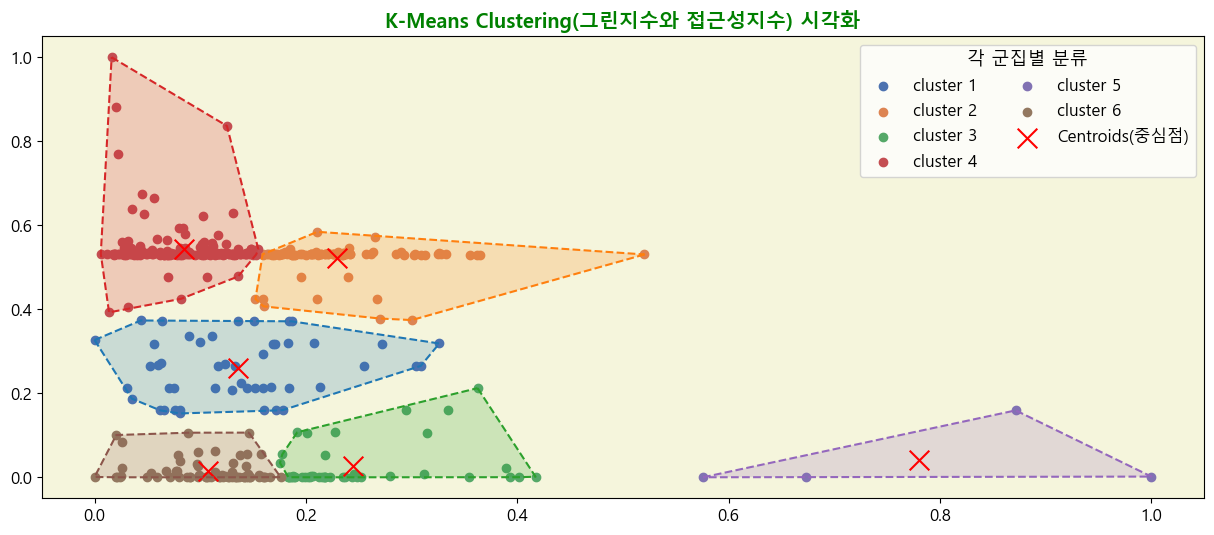

In [91]:
modern_palette = sb.color_palette("deep", n_colors=n)
plt.figure(figsize=(15, 6))
plt.title('K-Means Clustering(그린지수와 접근성지수) 시각화', color='green',fontweight='bold')
# plt.xlabel('사회적약자_지원_인프라_밀집도minmax', color='green',fontweight='bold')
# plt.ylabel('그린지수minmax', color='green',fontweight='bold')
plt.gca().set_facecolor("Beige")
tmp_x = Z
for i in range(n):
    points = tmp_x[clusters2 == i] #클러스터 변수
    plt.scatter(points[:, 1], points[:, 0], label=f'cluster {i+1}',color=modern_palette[i])

    hull = ConvexHull(points)
    vert = np.append(hull.vertices, hull.vertices[0])  # close the polygon by appending the first point at the end
    plt.plot(points[vert, 1], points[vert, 0], '--', )
    plt.fill(points[vert, 1], points[vert, 0], alpha=0.2)

plt.scatter(centroids2[:, 1], centroids2[:, 0], s=200, c='red', label='Centroids(중심점)', marker='x') #센트로이드 변수

plt.legend(title="각 군집별 분류",title_fontsize=13,ncol=2,loc='upper right')
plt.show()
plt.close()

### 여가생활과 사회적 약자 지수

In [93]:
origin6=origin2.copy()
XX = origin6.iloc[:,[2,3]].values #x값으로 여가생활지수,사회적약자지수 지정
XX[:5]

array([[0.03829759, 0.12017876],
       [0.09350384, 0.03372072],
       [0.0771323 , 0.07869154],
       [0.02457249, 0.10408629],
       [0.00764895, 0.48987935]])

In [94]:
n=6
kmeans3 = KMeans(n_clusters=n,n_init=10,max_iter=100).fit(XX) #군집 6개로 나누겠다
clusters3 = kmeans3.fit_predict(XX)

In [95]:
centroids3 = kmeans3.cluster_centers_
centroids3

array([[0.02699848, 0.11075619],
       [0.15109807, 0.02786931],
       [0.01494193, 0.63779189],
       [0.58310727, 0.01675136],
       [0.03675881, 0.03280649],
       [0.03917429, 0.30589457]])

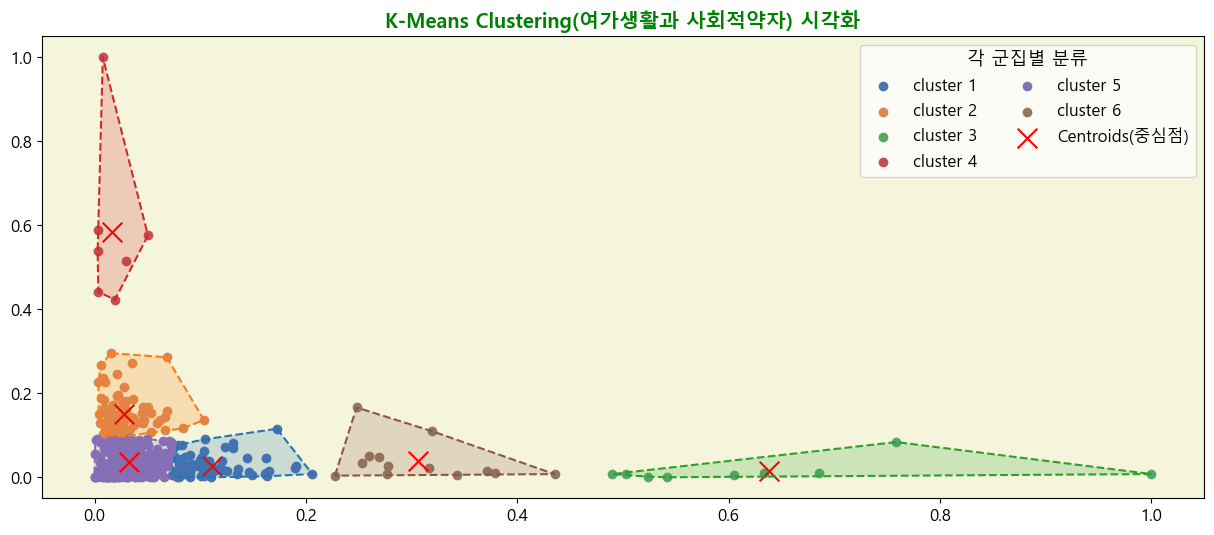

In [96]:
modern_palette = sb.color_palette("deep", n_colors=n)
plt.figure(figsize=(15, 6))
plt.title('K-Means Clustering(여가생활과 사회적약자) 시각화', color='green',fontweight='bold')
# plt.xlabel('사회적약자_지원_인프라_밀집도minmax', color='green',fontweight='bold')
# plt.ylabel('그린지수minmax', color='green',fontweight='bold')
plt.gca().set_facecolor("Beige")
tmp_x = XX
for i in range(n):
    points = tmp_x[clusters3 == i] #클러스터 변수
    plt.scatter(points[:, 1], points[:, 0], label=f'cluster {i+1}',color=modern_palette[i])

    hull = ConvexHull(points)
    vert = np.append(hull.vertices, hull.vertices[0])  # close the polygon by appending the first point at the end
    plt.plot(points[vert, 1], points[vert, 0], '--', )
    plt.fill(points[vert, 1], points[vert, 0], alpha=0.2)

plt.scatter(centroids3[:, 1], centroids3[:, 0], s=200, c='red', label='Centroids(중심점)', marker='x') #센트로이드 변수

plt.legend(title="각 군집별 분류",title_fontsize=13,ncol=2,loc='upper right')
plt.show()
plt.close()

### 여가생활과 접근성지수

In [97]:
origin7=origin2.copy()
YY = origin7.iloc[:,[2,4]].values #x값으로 여가생활지수,접근성지수 지정
YY[:5]

array([[0.03829759, 0.03532155],
       [0.09350384, 0.13141365],
       [0.0771323 , 0.04061359],
       [0.02457249, 0.04338528],
       [0.00764895, 0.01899458]])

In [98]:
n=6
kmeans4 = KMeans(n_clusters=n,n_init=10,max_iter=100).fit(YY) #군집 6개로 나누겠다
clusters4 = kmeans4.fit_predict(YY)

In [99]:
centroids4 = kmeans4.cluster_centers_
centroids4

array([[0.0864412 , 0.29543657],
       [0.02798687, 0.06351597],
       [0.58310727, 0.26469287],
       [0.15396858, 0.153094  ],
       [0.03897885, 0.16274785],
       [0.02955385, 0.84828687]])

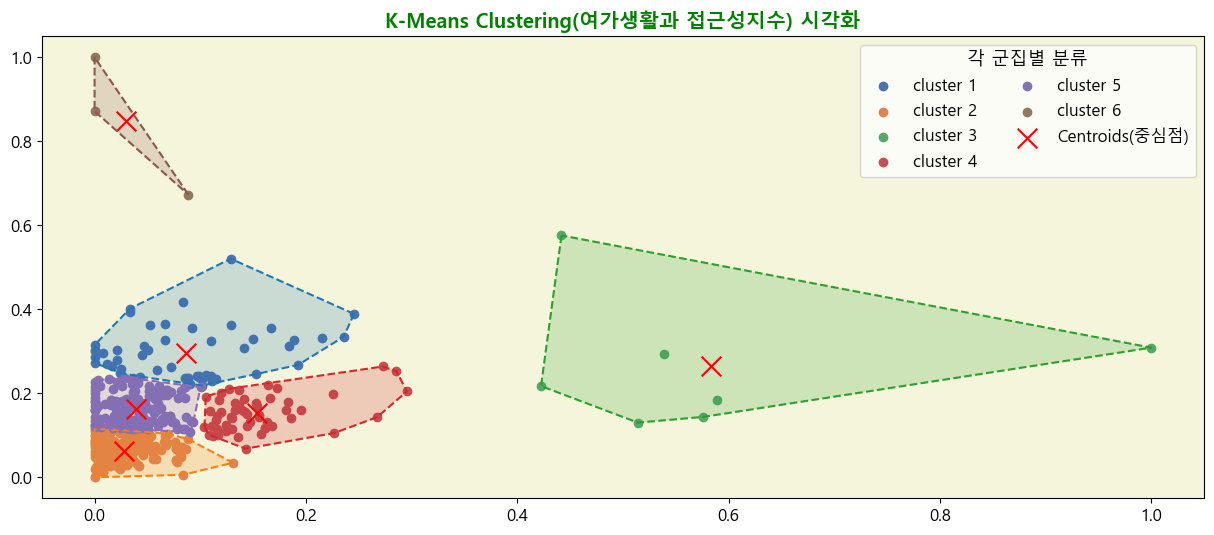

In [101]:
modern_palette = sb.color_palette("deep", n_colors=n)
plt.figure(figsize=(15, 6))
plt.title('K-Means Clustering(여가생활과 접근성지수) 시각화', color='green',fontweight='bold')
# plt.xlabel('여가생활지수minmax', color='green',fontweight='bold')
# plt.ylabel('접근성지수minmax', color='green',fontweight='bold')
plt.gca().set_facecolor("Beige")
tmp_x = YY
for i in range(n):
    points = tmp_x[clusters4 == i] #클러스터 변수
    plt.scatter(points[:, 0], points[:, 1], label=f'cluster {i+1}',color=modern_palette[i])

    hull = ConvexHull(points)
    vert = np.append(hull.vertices, hull.vertices[0])  # close the polygon by appending the first point at the end
    plt.plot(points[vert, 0], points[vert, 1], '--', )
    plt.fill(points[vert, 0], points[vert, 1], alpha=0.2)

plt.scatter(centroids4[:, 0], centroids4[:, 1], s=200, c='red', label='Centroids(중심점)', marker='x') #센트로이드 변수

plt.legend(title="각 군집별 분류",title_fontsize=13,ncol=2,loc='upper right')
plt.show()
plt.close()

### 사회적약자지수와 접근성지수

In [102]:
origin8=origin2.copy()
ZZ = origin8.iloc[:,[3,4]].values #x값으로 사회적약자지수,접근성지수 지정
ZZ[:5]

array([[0.12017876, 0.03532155],
       [0.03372072, 0.13141365],
       [0.07869154, 0.04061359],
       [0.10408629, 0.04338528],
       [0.48987935, 0.01899458]])

In [103]:
n=6
kmeans5 = KMeans(n_clusters=n,n_init=10,max_iter=100).fit(ZZ) #군집 6개로 나누겠다
clusters5 = kmeans5.fit_predict(ZZ)

In [104]:
centroids5 = kmeans5.cluster_centers_
centroids5

array([[0.02798306, 0.18108913],
       [0.23145297, 0.06551763],
       [0.61753476, 0.02464595],
       [0.05657941, 0.08258321],
       [0.00175652, 0.78016439],
       [0.01866671, 0.3214819 ]])

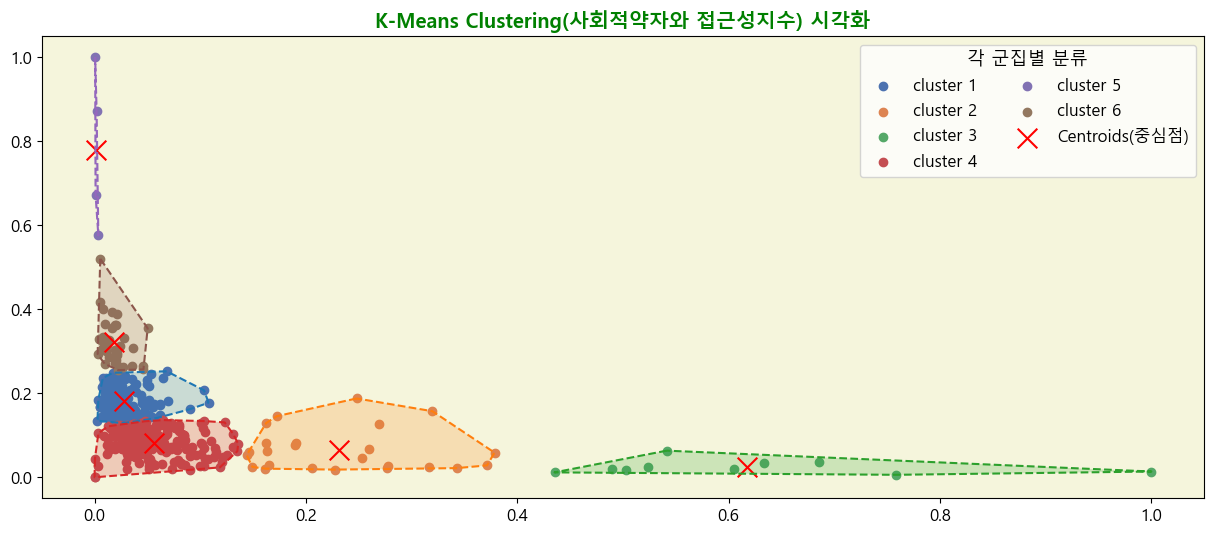

In [105]:
modern_palette = sb.color_palette("deep", n_colors=n)
plt.figure(figsize=(15, 6))
plt.title('K-Means Clustering(사회적약자와 접근성지수) 시각화', color='green',fontweight='bold')
# plt.xlabel('여가생활지수minmax', color='green',fontweight='bold')
# plt.ylabel('접근성지수minmax', color='green',fontweight='bold')
plt.gca().set_facecolor("Beige")
tmp_x = ZZ
for i in range(n):
    points = tmp_x[clusters5 == i] #클러스터 변수
    plt.scatter(points[:, 0], points[:, 1], label=f'cluster {i+1}',color=modern_palette[i])

    hull = ConvexHull(points)
    vert = np.append(hull.vertices, hull.vertices[0])  # close the polygon by appending the first point at the end
    plt.plot(points[vert, 0], points[vert, 1], '--', )
    plt.fill(points[vert, 0], points[vert, 1], alpha=0.2)

plt.scatter(centroids5[:, 0], centroids5[:, 1], s=200, c='red', label='Centroids(중심점)', marker='x') #센트로이드 변수

plt.legend(title="각 군집별 분류",title_fontsize=13,ncol=2,loc='upper right')
plt.show()
plt.close()

## DBSCAN 시각화

In [106]:
origin2=origin1.copy()
X = origin2.iloc[:,[1,2]].values #x값으로 공원면적,여가생활지수 지정
X[:5] #5개까지만 보이게

array([[0.1871514 , 0.03829759],
       [0.03370444, 0.09350384],
       [0.5303279 , 0.0771323 ],
       [0.5303279 , 0.02457249],
       [0.53095996, 0.00764895]])

In [110]:
dbscan=DBSCAN(eps=0.03,min_samples=5,leaf_size=10,metric='chebyshev')
dbscan.fit(X)
clusters11=dbscan.fit_predict(X)